# Demo 5 - Demonstração - Deep Learning - Convolutional Neural Networks (CNNs)

### Cybersecurity MBA - Inteligência Artificial e Machine Learning (SEG)

### Prof. Dr. Ahirton Lopes (profahirton.lopes@fiap.com.br)

### Convolutional Neural Networks usando Keras e CIFAR-10

### Carregando a base CIFAR-10 (imagens rotuladas em macro categorias)

*** Mais informações em https://www.cs.toronto.edu/~kriz/cifar.html ***

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

# carregando o dataset pré-randomizado de treinamento bem como os dados de teste

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

## Visualizando as primeiras 24 imagens do dataset de treinamento

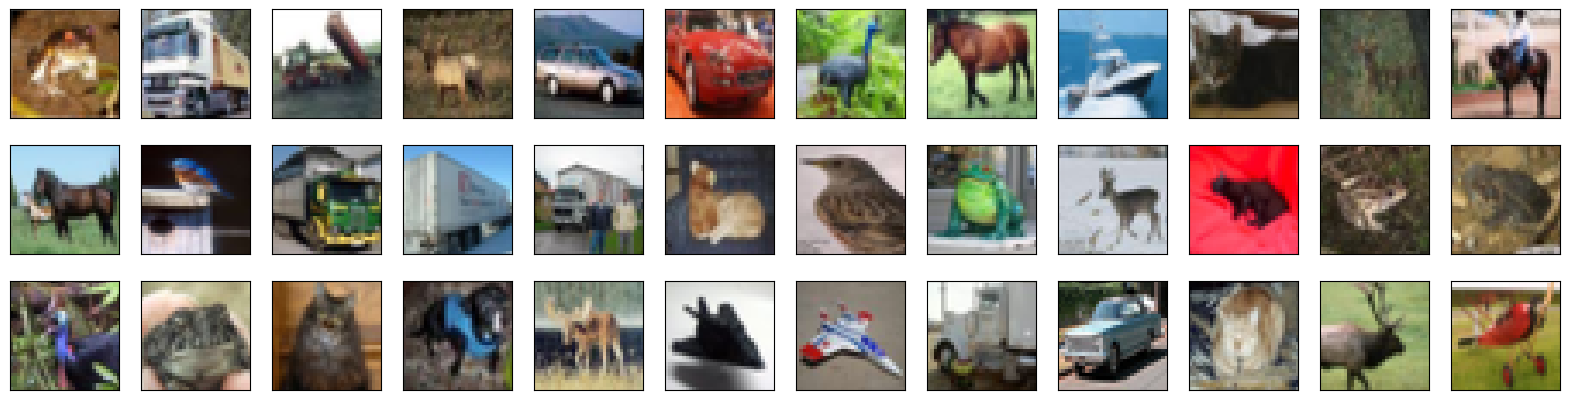

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))


## Redimensionando as imagens e dividindo cada pixel em cada imagem por 255

In [18]:
# redimensionamento [0,255] --> [0,1]

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

## Dividindo o dataset em treinamento, teste e validação

In [19]:
from keras import utils

# "one-hot encoding" aplicado aos rótulos

num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# divindo dataset de treinamento em treinamento, teste e validação

(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# impressão da forma do conjunto de treino

print('formato x_train:', x_train.shape)

# impressão do número de imagens nos datasets de treinamento, teste e validação

print(x_train.shape[0], 'amostras de treinamento')
print(x_test.shape[0], 'amostras de teste')
print(x_valid.shape[0], 'amostras de validação')

formato x_train: (45000, 32, 32, 3)
45000 amostras de treinamento
10000 amostras de teste
5000 amostras de validação


## Definindo a arquitetura do modelo (IMPORTANTE!)

* 3 camadas convolucionais de tamanho progressivamente crescente
* Máximo de camadas de "pooling" (2x2) seguidas por tais 3 camadas convolucionais
* Uma camada do tipo totalmente conectada de 100 neurônios
* Últimas camadas do tipo totalmente conectadas de 10 saídas (10 classes de categoria de imagem)
* "Dropout" de 0,2-0,3

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu',
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

# tentem com outras funções de ativação!
# mais informações em https://keras.io/activations/

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │         204,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 247,478 (966.71 KB)

 Trainable params: 247,478 (966.71 KB)

 Non-trainable params: 0 (0.00 B)

## Compilando o modelo

In [21]:
# compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
# mais informações em https://keras.io/losses/
# mais informações em https://keras.io/optimizers/
# mais informações em https://keras.io/metrics/

model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
                  metrics=['accuracy'])

## Treinando o modelo

In [22]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5.keras', verbose=1,
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=64, epochs=10,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer],
          verbose=2, shuffle=True)

# tentem mudar o número de épocas de treinamento e verificar o comportamento de nosso algoritmo

Epoch 1/10

Epoch 1: val_loss improved from inf to 1.42875, saving model to model.weights.best.hdf5.keras
704/704 - 9s - 13ms/step - accuracy: 0.3618 - loss: 1.7495 - val_accuracy: 0.4928 - val_loss: 1.4287
Epoch 2/10

Epoch 2: val_loss improved from 1.42875 to 1.28517, saving model to model.weights.best.hdf5.keras
704/704 - 6s - 8ms/step - accuracy: 0.5052 - loss: 1.3861 - val_accuracy: 0.5314 - val_loss: 1.2852
Epoch 3/10

Epoch 3: val_loss improved from 1.28517 to 1.17287, saving model to model.weights.best.hdf5.keras
704/704 - 3s - 4ms/step - accuracy: 0.5648 - loss: 1.2302 - val_accuracy: 0.5854 - val_loss: 1.1729
Epoch 4/10

Epoch 4: val_loss improved from 1.17287 to 1.14594, saving model to model.weights.best.hdf5.keras
704/704 - 5s - 7ms/step - accuracy: 0.6098 - loss: 1.1185 - val_accuracy: 0.5738 - val_loss: 1.1459
Epoch 5/10

Epoch 5: val_loss improved from 1.14594 to 0.96286, saving model to model.weights.best.hdf5.keras
704/704 - 3s - 4ms/step - accuracy: 0.6327 - loss: 1.

## Carregando o modelo com a melhor precisão de validação

In [23]:
# carregando os pesos que geraram a melhor precisão de validação

model.load_weights('model.weights.best.hdf5.keras')

## Cálculo da precisão de classificação no dataset de testes

In [24]:
# avaliando e imprimindo a precisão do teste

score = model.evaluate(x_test, y_test, verbose=0)
print('\n', ' Acuracia de Teste:', score[1])


  Acuracia de Teste: 0.6923999786376953


## Visualizar algumas predições

As visualizações podem nos dar algumas dicas sobre por que a rede classifica erroneamente alguns objetos.

In [25]:
# obtendo previsões no conjunto de testes

y_hat = model.predict(x_test)

# definindo rótulos de texto (rótulos disponíveis na fonte original: https://www.cs.toronto.edu/~kriz/cifar.html)

cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


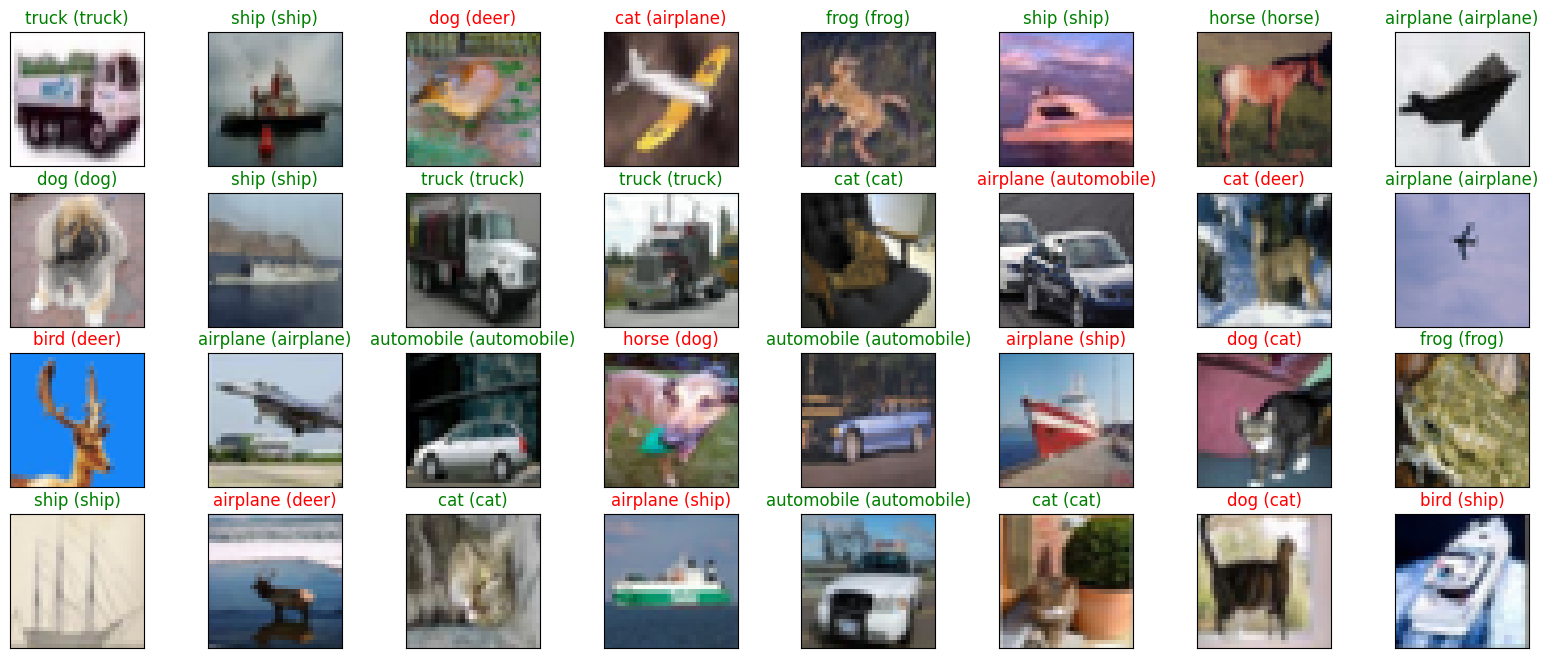

In [26]:
# plot de amostra aleatória de imagens de teste, rótulos preditos e a "ground truth" advinda do dataset CIFAR-10

fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

    # amostras corretamente classificadas em verde e incorretamente classificadas em vermelho
